Google Colab Notebook Link: https://colab.research.google.com/drive/19Z6Bg10LtQEbUUrc3jSnjAKpXd2pWj7s#scrollTo=mFy2TthQkriQ

# **Long-Range Dependencies**


> Correlation Function (2 points)



In [243]:
#Import libraries
import string
import numpy as np
from string import punctuation
from collections import Counter
import matplotlib.pyplot as plt

In [244]:
#Tokenizer
def tokenize(text):
    for val in punctuation:
        text = text.replace(val, "")
    text = text.replace("\n", " ")
    text = text.translate(str.maketrans('','','"一■–ー\n\t'))
    text = text.replace('“', "")
    text = text.replace('”', "") 
    text = text.lower()
    text = text.split() 
    with open('/content/processed.txt', 'w') as f:
      for items in text:
        f.write("%s \n" %items)
    return text

In [245]:
#Plot Correlations
def plot_results(result, w1, w2):
    x,y = zip(*result)
    plt.plot(x,y)
    plt.xlabel("Distance")
    plt.ylabel("Correlation")
    plt.title("Correlation")
    plt.legend(['Cor b/n: {} {}'.format(w1, w2)])
    plt.show()

In [246]:
#Correlation function
def word_correlations(text, w1, w2, dist):
    count_w1 = Counter(text)[w1]
    count_w2 = Counter(text)[w2]
    prob_w1 = count_w1 / len(text)
    prob_w2 = count_w2 / len(text)
    results = []
    #print(count_w1, count_w2)
    #print(prob_w1, prob_w2)
    for idist in range(1, dist):
        span = 0
        for i in range(len(text) - idist):
            if text[i] == w1:
                if text[i + idist] == w2:
                    span += 1
        prob_mutual = span / (len(text) - idist)
        correlation_mutual = prob_mutual / (prob_w1 * prob_w2)
        results.append((idist, correlation_mutual))
    #print(results)
    return results

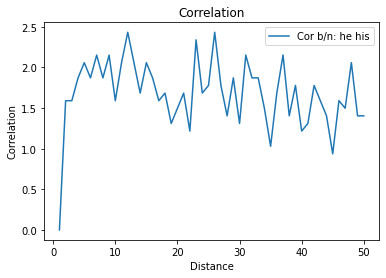

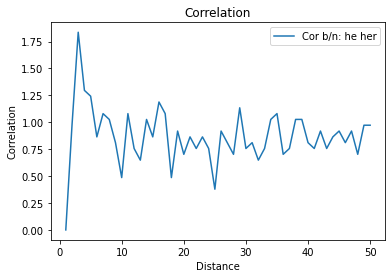

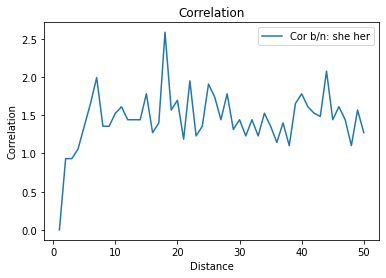

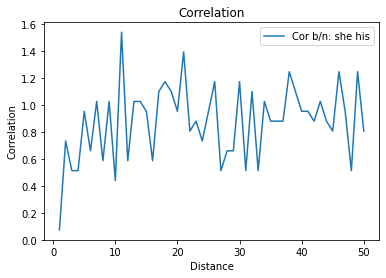

In [248]:
#Program driver code
te = '/content/English_train.txt'
file = open(te, 'rt')
text = file.read()
file.close()
text = tokenize(text)

#Correlation between ("he","his")
results = word_correlations(text, w1="he", w2="his", dist=51)
plot_results(results, w1="he", w2="his")

#Correlation between ("he","her")
results = word_correlations(text, w1="he", w2="her", dist=51)
plot_results(results, w1="he", w2="her")

#Correlation between ("she","her")
results = word_correlations(text, w1="she", w2="her", dist=51)
plot_results(results, w1="she", w2="her")

#Correlation between ("she","his")
results = word_correlations(text, w1="she", w2="his", dist=51)
plot_results(results, w1="she", w2="his")

**Task 1 Result Inference (c):** 

>  It can be observed (subtle) that the correlation between the mentioned words achieve the highest correlation before the distance of 20 and later the corr value drops or fluctuates extremely depending on the words occuring in this span between the target words W1 and W2



# **3) Kneser-Ney Smoothing (2 points)**

In [239]:
#Tokenize and ngram generattion
import re
import math

file1= open("English_train.txt","r").read()
vocab_uni=list(Counter(tokenize(file1)).keys())
vocab_bi=list(Counter(tokenize(file1)).keys())+['<s>', '<\s>']
file1=open("English_train.txt","r",encoding="utf-8").readlines()

text_list_unigram=[]
text_list=[]
text_list_bigram=[]

#Using the pre-given tokenizer instead of my custom tokenize function"
def tokenize(text):
    return re.findall('[a-z]+', text.lower())

def ngrams(sentence,n):
    text=tokenize(sentence)
    if n==1:
        return text
    if n==2:
        text.insert(0,"<s>")
        text.insert(len(text),"</s>")
        text_list.extend(text)

def gen_ngram(n):
    for i in range(len(text_list)-1):
        text_list_bigram.append((text_list[i],text_list[i+1]))

In [240]:
def smoothed(word, alpha):
    nu=0
    nu+=unigram_frequency[(word)]
    P=(alpha+nu)/((alpha*len(vocab_uni))+d)
    return P

def token_dict(file1,n):
    for i in file1:
        if(n==1):
            text_list_unigram.extend(ngrams(i,n))
        else:
            ngrams(i,n)

In [242]:
n1w1=0
n1w2=0

token_dict(file1,1)
unigram_frequency=Counter(text_list_unigram)

token_dict(file1,2)
gen_ngram(2)
bigram_frequency=Counter(text_list_bigram)

Nw1= unigram_frequency[("longbourn")]
Nw2= unigram_frequency[("pleasure")]
d = np.sum(list(unigram_frequency.values()))

for k in unigram_frequency:
    if bigram_frequency[(k,"longbourn")] != 0:
        n1w1+=1
    if bigram_frequency[(k,"pleasure")] != 0:
        n1w2+=1

#Lidstone Smoothing
PLids1=(-1)*(Lids1+math.log2(smoothed("longbourn",1)))
PLids2=(-1)*(Lids2+math.log2(smoothed("pleasure",1)))

#KN Smoothing
PKN1=(-1)*math.log2((n1w1/len(bigram_frequency)))
PKN2=(-1)*math.log2((n1w2/len(bigram_frequency)))

print('Count of Longbourn: {} & Pleasure: {}'.format(Nw1, Nw2))
print('Count of Bi-grams ending with Longbourn: {} & Pleasure: {}'.format(n1w1, n1w2))
print('Negative log2(P Lidstone) for Longbourn: {} & Pleasure: {}'.format(PLids1, PLids2))
print('Negative log2(P Kneser-Ney) for Longbourn: {} & Pleasure: {}'.format(PKN1, PKN2))

Count of Longbourn: 142 & Pleasure: 142
Count of Bi-grams ending with Longbourn: 11 & Pleasure: 25
Negative log2(P Lidstone) for Longbourn: 10.437752072323603 & Pleasure: 10.437752072323603
Negative log2(P Kneser-Ney) for Longbourn: 12.014179013458373 & Pleasure: 10.829754442320946


# **Result:**

Count of Longbourn: 142 & Pleasure: 142


Count of Bi-grams ending with Longbourn: 11 & Pleasure: 25


Negative log2(P Lidstone) for Longbourn: 10.437752072323603 & Pleasure: 10.437752072323603


Negative log2(P Kneser-Ney) for Longbourn: 12.014179013458373 & Pleasure: 10.829754442320946

# **b. Idea behind the Kneser Ney smoothing technique (Ref: Stanford NLP)**
•	KN smoothing is an extension of absolute discounting with a clever way of constructing the lower-order model.

•	The lower-order model constructed above is significant only when count is very small in the higher-order model and thus it should be optimized.

